In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score



In [3]:
trading_data = pd.read_csv("/Users/praphullapokharel/Downloads/trading_data.csv", index_col =0)

In [4]:
trading_data.head()


,midprice,id,buy/sell,answeredprice,deal
0,97.9990,4,1,98.016,0.0
1,97.9988,4,-1,98.001,1.0
2,97.9951,1,-1,97.979,0.0
3,97.9971,1,1,97.990,1.0
4,97.9961,1,-1,97.978,0.0


In [5]:
trading_data['PriceDiff'] = (trading_data['answeredprice'] - trading_data['midprice'])* trading_data['buy/sell']

In [6]:
trading_data.head()

,midprice,id,buy/sell,answeredprice,deal,PriceDiff
0,97.9990,4,1,98.016,0.0,0.0170
1,97.9988,4,-1,98.001,1.0,-0.0022
2,97.9951,1,-1,97.979,0.0,0.0161
3,97.9971,1,1,97.990,1.0,-0.0071
4,97.9961,1,-1,97.978,0.0,0.0181


In [7]:
x_train = trading_data['PriceDiff'][:2000].to_numpy().reshape(-1,1)
y_train = trading_data['deal'][:2000].to_numpy()
x_train, y_train


(array([[ 0.017 ],
        [-0.0022],
        [ 0.0161],
        ...,
        [-0.0162],
        [ 0.0178],
        [-0.0087]]),
 array([0., 1., 0., ..., 1., 0., 1.]))

# Question1

In this step, a logistical regression is performed using the training data: x_train and y_train to create a model that allows us to see if a client undertakes a deal or not based on the price difference and historical deal values.

Three variations of logisitical regression models were tried:
1) Default Model as provided by sklearn library

2) Default Model but with fitted values

3) Model with no penalty 

In [36]:
log_clf_normal = LogisticRegression()
log_clf_normal.fit(x_train, y_train)

LogisticRegression()

In [37]:
log_clf_normal.intercept_, log_clf_normal.coef_, log_clf_normal.n_iter_

(array([0.10117626]), array([[-7.64395146]]), array([10], dtype=int32))

In [38]:
alpha_normal = log_clf_normal.intercept_[0]
beta_normal = log_clf_normal.coef_[0][0]


print(alpha_normal, beta_normal)

0.10117625938092163 -7.643951460391229


In [39]:


def performance(y_real, y_predicted):
    print('The confusion matrix is:')
    print(confusion_matrix(y_real, y_predicted))
    metrics = {'Accuracy' : accuracy_score, 'Precision' : precision_score, 'Recall': recall_score, 'F1': f1_score}
    for metric, func  in metrics.items():
        print(metric+': %.2f'%(func(y_real, y_predicted)))



In [41]:
x_test = trading_data['PriceDiff'][2000:].to_numpy().reshape(-1,1)
ytrain_predicted_normal = log_clf_normal.predict(x_train[:2000])

performance(y_train, ytrain_predicted_normal)

#One can see that the attained accracy and precision score of this model is around 0.66 and 0.61 respectively. 
#These values are interpreted as rather low values and it is believed that a better model with higher 
#accuracy and precision score could be created

The confusion matrix is:
[[ 276  677]
 [   8 1039]]
Accuracy: 0.66
Precision: 0.61
Recall: 0.99
F1: 0.75


array([0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

# Remark
A probability function is also defined based on the obtained alpha and beta values from the logisitic regression to calculate the probability of the client accepting the provided prices from the bond dealer and the deal being accepted by the client. 
We know that the logistic regression model follows the following format:

$${p} = \frac{1}{1+\exp^{-(\alpha+\beta*x)}}$$

However, our required probability model is of the following format
$${p} = \frac{1}{1+\exp^{(\alpha+\beta*x)}}$$

So, a minus sign is added infront of alpha and beta variable while defining the probability function

In [42]:
def probability(alpha, beta, price_diff):
    return 1/(1+np.exp(-alpha-beta*price_diff))

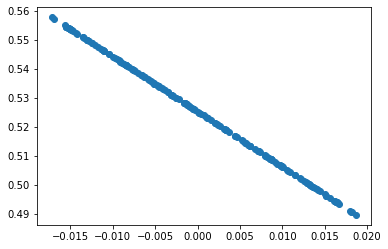

In [70]:
x_test = trading_data['PriceDiff'][2000:].to_numpy().reshape(-1,1)
y_proba_normal = probability(alpha_normal, beta_normal, x_test)
plt.scatter(x_test,y_proba_normal)
plt.show()

#We can also see that from the default logistic regression model, the predicted values do not follow a sigmoid curve. 


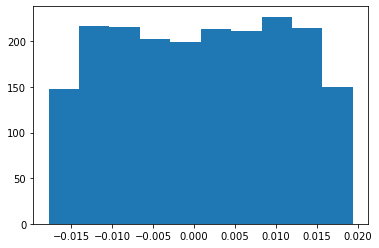

In [61]:
from sklearn.preprocessing import StandardScaler
plt.hist(x_train)
plt.show()

#In this step, the xtrain data is fit and transformed to obtain a normal distribution for it. Although normalization
# is not required for the logistic regression, one can interpret the results by normalizing the xtrain data which
# will provide a better scale for the model to analyze the data. From the plot below, one can see that the xtrain
#data is in a compact range(x-asis). However, normalizing will allow the model to interpret the data on a more 
#flexible range.

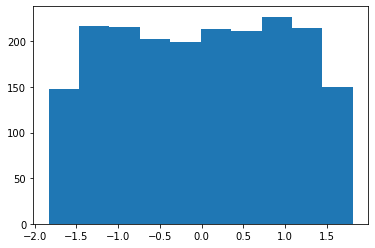

In [62]:
sc = StandardScaler()
sc.fit(x_train)
x_train_reduced = sc.transform(x_train)
#X_train_reduced = sc.fit_transform(X_train)
#One can see the data is not in a more flexible scale in the x-axis which can be used to obtain more robust results. 

In [55]:
log_clf_normal.fit(x_train_reduced, y_train)

LogisticRegression()

In [56]:
log_clf_normal.n_iter_

array([9], dtype=int32)

In [57]:
y_test_fitted = log_clf_normal.predict(x_train_reduced[:2000])
print(y_test_fitted)
performance(y_train, y_test_fitted)

#here, one can see that a better results are obtained compared to the results above. 

[0. 1. 0. ... 1. 0. 1.]
The confusion matrix is:
[[848 105]
 [114 933]]
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1: 0.89


0.3154565154115195 -3.38699431643644


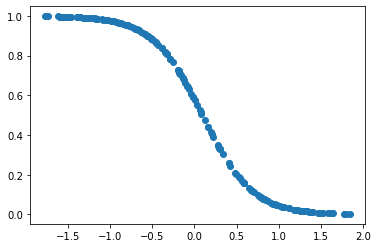

In [71]:
alpha_fitted = log_clf_normal.intercept_[0]
beta_fitted = log_clf_normal.coef_ [0][0]

print(alpha_fitted, beta_fitted)

x_test_reduced = sc.fit_transform(x_test)
y_proba_reduced = probability(alpha_fitted, beta_fitted, x_test_reduced)

plt.scatter(x_test_reduced,y_proba_reduced)
plt.show()

#as one can see, this model provided probability values that follow a sigmoid curve. 

In [25]:
#This model uses the parameter that no regularization penalty is applied on the logistic model 
log_clf_nopenalty = LogisticRegression(penalty="none")
log_clf_nopenalty.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [74]:
y_predicted_nopenalty = log_clf_nopenalty.predict(x_train[:2000])

performance(y_train, y_predicted_nopenalty)
alpha_nopenalty = log_clf_nopenalty.intercept_[0]
beta_nopenalty = log_clf_nopenalty.coef_[0][0]



#From the results of the confusion matrix, there seems to be no difference between this model and the previous model. 
#To complete the requirement of question 1, the results from this model is used to obtain the final probabilities for 
#last 200 rows of client data. 

The confusion matrix is:
[[848 105]
 [114 933]]
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1: 0.89
0.6327593123792238 -339.65335145135606


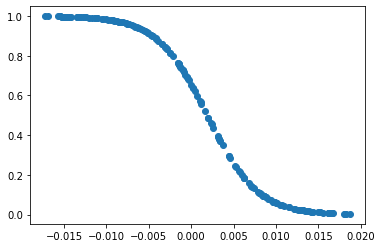

Alpha: 0.6327593123792238
Beta: -339.65335145135606


In [76]:
y_proba_nopenalty = probability(alpha_nopenalty, beta_nopenalty, x_test)
plt.scatter(x_test,y_proba_nopenalty)
plt.show()

#as one can see, this model provided probability values that follow a sigmoid curve. 
print('Alpha:',alpha_nopenalty)
print("Beta:", beta_nopenalty)
        

In [80]:
test_data = trading_data[2000:]
test_data.head()
test_data['Probability'] = probability(alpha_nopenalty, beta_nopenalty, test_data['PriceDiff'])
test_data

#Here, one can see the final probability results for each client with the probability of taking the deal in the 
#data frame below:

/var/folders/qs/jllp__d54fddcj1w5cn7yqsr0000gn/T/ipykernel_86248/3380263121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Probability'] = probability(alpha_nopenalty, beta_nopenalty, test_data['PriceDiff'])


,midprice,id,buy/sell,answeredprice,deal,PriceDiff,Probability
2000,98.0025,3,1,98.001,NaN,-0.0015,0.758091
2001,98.0003,2,-1,98.015,NaN,-0.0147,0.996409
2002,98.0020,4,-1,97.984,NaN,0.0180,0.004148
2003,97.9991,4,1,97.988,NaN,-0.0111,0.987906
2004,98.0003,2,-1,98.008,NaN,-0.0077,0.962604
...,...,...,...,...,...,...,...
2195,97.9943,1,-1,97.995,NaN,-0.0007,0.704853
2196,97.9977,2,1,98.014,NaN,0.0163,0.007365
2197,97.9999,3,1,98.009,NaN,0.0091,0.078849
2198,98.0019,2,-1,98.007,NaN,-0.0051,0.914118


# Question 2:

In this step, the clients data is separated based on their behaviour as shown by the deal column in the original data set based on the price difference. Here, the clients id column is set as a categorical variable and a kmeans clustering library is applied on the given dataset to separate the clients into two clusters. The price difference and the deal columns are used to separate the clients.

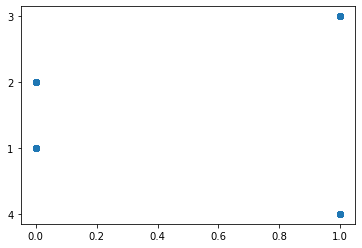

In [88]:
#Q2 clustering the clients into two groups
from sklearn.cluster import KMeans
kmeans = KMeans(2)

cluster_data = trading_data[['id','deal','PriceDiff']][:2000]
cluster_data['id'] = cluster_data['id'].astype('str')
kmeans.fit(cluster_data)
clusters = kmeans.fit_predict(cluster_data)

#a new column is added on the cluster datafram with the cluster labels so that it will be easy to filter the data based
#on the cluster that the client falls on
cluster_data['cluster']=kmeans.labels_


plt.scatter(cluster_data['cluster'], cluster_data['id'])
plt.show()

#From the results of the kmeans clustering , we can see that clients 1,2 and 3,4 form clusters, i.e. 1 and 2 have similar
#behaviour based on the given data and so do 3,4.


# Question 3

Now that we know that clients 1,2 and 3,4 have similar behavior, we can build new xtrain and ytrain data by filtering the given data set based on the cluster labels obtained from the previous steps. Logisitc regression is applied on the new xtrain and ytrain for each cluster to obtain new alpha and beta values which will be used to respectively to obtain the probability of train for the last 200 entries. 

In [89]:
cluster0_xtrain = cluster_data[cluster_data['cluster']==0]["PriceDiff"].to_numpy().reshape(-1,1)
cluster1_xtrain = cluster_data[cluster_data['cluster']==1]["PriceDiff"].to_numpy().reshape(-1,1)
cluster0_ytrain = cluster_data[cluster_data['cluster']==0]["deal"].to_numpy()
cluster1_ytrain = cluster_data[cluster_data['cluster']==1]["deal"].to_numpy()

In [90]:
cluster0_log_clf= LogisticRegression(penalty="none")
cluster0_log_clf.fit(cluster0_xtrain, cluster0_ytrain)
alpha_c0 = cluster0_log_clf.intercept_[0]
beta_c0 = cluster0_log_clf.coef_[0][0]
print(alpha_c0, beta_c0)

0.5910957023537159 -322.0455300484333


In [91]:
cluster1_log_clf= LogisticRegression(penalty="none")
cluster1_log_clf.fit(cluster1_xtrain, cluster1_ytrain)
alpha_c1 = cluster1_log_clf.intercept_[0]
beta_c1= cluster1_log_clf.coef_[0][0]
print(alpha_c1, beta_c1)

0.6818100113102749 -359.00837771603364


In [92]:
xtest = trading_data[2000:].reset_index(drop=True)
xtest['probability'] = np.nan



In [93]:

# return probability(alpha_nopenalty, beta_nopenalty, x_test)

In [94]:
for x in range(len(xtest)):
    if ((xtest.iloc[x]['id'] == 1)|(xtest.iloc[x]['id'] ==2)):
        xtest.loc[x,'probability'] = probability(alpha_c0, beta_c0, xtest.loc[x,'PriceDiff'])
    else:
        xtest.loc[x,'probability'] = probability(alpha_c1, beta_c1, xtest.loc[x,'PriceDiff'])
xtest

#here one can see the probability of trade for each entry based on the cluster that the client falls on. 

,midprice,id,buy/sell,answeredprice,deal,PriceDiff,probability
0,98.0025,3,1,98.001,NaN,-0.0015,0.772120
1,98.0003,2,-1,98.015,NaN,-0.0147,0.995156
2,98.0020,4,-1,97.984,NaN,0.0180,0.003078
3,97.9991,4,1,97.988,NaN,-0.0111,0.990685
4,98.0003,2,-1,98.008,NaN,-0.0077,0.955674
...,...,...,...,...,...,...,...
195,97.9943,1,-1,97.995,NaN,-0.0007,0.693499
196,97.9977,2,1,98.014,NaN,0.0163,0.009394
197,97.9999,3,1,98.009,NaN,0.0091,0.070099
198,98.0019,2,-1,98.007,NaN,-0.0051,0.903220
